# <b> SALES PREDICTION USING PYTHON

## <b> Sales prediction means predicting how much of a product people will buy based on factors such as the amount you spend to advertise your product,  the segment of people you advertise for, or the platform you are advertising on about your product .



## Typically, a product and service-based business always need their Data Scientist to predict their future sales with every step they take to manipulate the cost of advertising their product. So let’s start the task of sales prediction with machine learning using Python.



In [100]:
from IPython.display import Image,display,HTML
display(HTML(f"<div style='display: flex; justify-content: center;'><img src='Designer.png' height='500' width='600'></div>"))

## Importing Necessary Libraries

In [101]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import plotly.express as px
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

## Loading the Dataset

In [102]:
df = pd.read_csv('Advertising.csv')

### Top values of Dataset

In [103]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


### Bottom values of Dataset

In [104]:
df.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


### Dropping unnecessary column

In [105]:
df=df.drop(columns=['Unnamed: 0'])

### Checking for Null values

In [106]:
df.isnull()

,TV,Radio,Newspaper,Sales
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
195,False,False,False,False
196,False,False,False,False
197,False,False,False,False
198,False,False,False,False


### Sum of null values

In [107]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

## Basic Information of Dataset

In [108]:
df.shape

(200, 4)

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [110]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


# EDA OR DATA VISUALISATION :

## Comparing Sales with different Advertising Techniques:

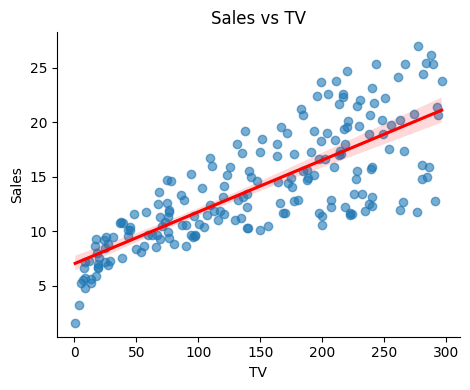

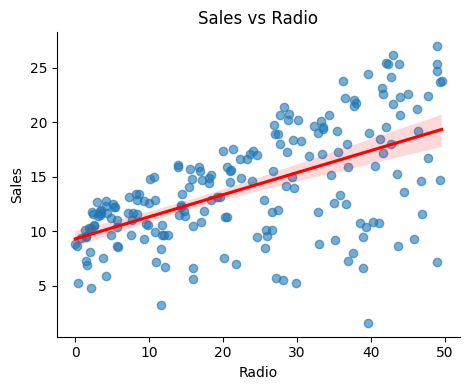

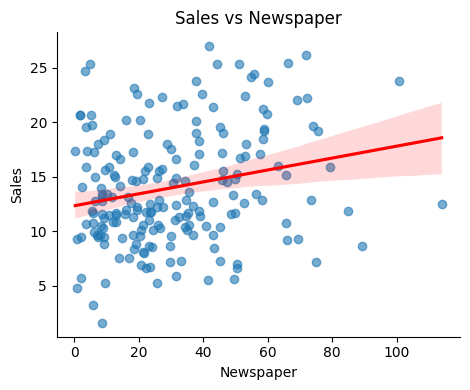

In [111]:
for feature in ['TV', 'Radio', 'Newspaper']:
    sns.lmplot(data=df, x=feature, y='Sales', height=4, aspect=1.2, scatter_kws={'alpha':0.6}, line_kws={"color": "red"})
    plt.title(f'Sales vs {feature}')
    plt.tight_layout()

plt.show()

## Heatmap of Co- Relation :

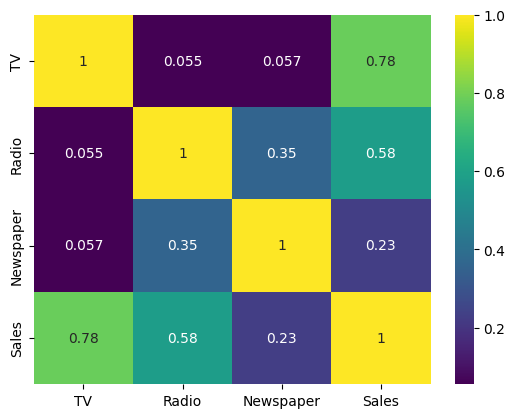

In [112]:
sns.heatmap(df.corr(),annot=True,cmap='viridis')
plt.show()


## Integrating columns from Dataset by Integer-Location based Indexing

In [113]:
x=df.iloc[:, 0:-1]
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [114]:
y=df.iloc[:,-1]
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

## Using train_test_split function to split and train Data

In [115]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.3, random_state=15)


In [116]:
X_train

,TV,Radio,Newspaper
97,184.9,21.0,22.0
20,218.4,27.7,53.4
169,284.3,10.6,6.4
137,273.7,28.9,59.7
181,218.5,5.4,27.4
...,...,...,...
156,93.9,43.5,50.5
128,220.3,49.0,3.2
119,19.4,16.0,22.3
133,219.8,33.5,45.1


In [117]:
X_val

,TV,Radio,Newspaper
49,66.9,11.7,36.8
191,75.5,10.8,6.0
12,23.8,35.1,65.9
172,19.6,20.1,17.0
127,80.2,0.0,9.2
40,202.5,22.3,31.6
30,292.9,28.3,43.2
170,50.0,11.6,18.4
138,43.0,25.9,20.5
57,136.2,19.2,16.6


In [118]:
y_train

97     15.5
20     18.0
169    15.0
137    20.8
181    12.2
       ... 
156    15.3
128    24.7
119     6.6
133    19.6
140    10.9
Name: Sales, Length: 140, dtype: float64

In [119]:
y_val

49      9.7
191     9.9
12      9.2
172     7.6
127     8.8
40     16.6
30     21.4
170     8.4
138     9.6
57     13.2
192     5.9
72      8.8
150    16.1
146    13.2
58     23.8
26     15.0
9      10.6
115    12.6
184    17.6
198    25.5
117     9.4
36     25.4
107     8.7
113    15.9
165    11.9
161    13.3
147    25.4
65      9.3
120    15.5
21     12.5
91      7.3
188    15.9
136     9.5
71     12.4
139    20.7
2       9.3
86     12.0
116    12.2
93     22.2
106     7.2
47     23.2
142    20.1
149    10.1
152    16.6
182     8.7
78      5.3
55     23.7
25     12.0
168    17.1
194    17.3
6      11.8
95     16.9
101    23.8
151    11.6
190    10.8
173    11.7
31     11.9
74     17.0
176    20.2
144    11.4
Name: Sales, dtype: float64

### Changing DataType from Float to Integer

In [120]:
X_train = X_train.astype(int)
X_val = X_val.astype(int)
y_train = y_train.astype(int)
y_val = y_val.astype(int)

# Importing and Fitting Linear Regression Model

In [121]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
     
LinearRegression()

LinearRegression()

### Predicting and Testing Model

In [122]:
train_preds = lr.predict(X_train)
test_preds = lr.predict(X_val)

## Calculating Efficiency of Model :

In [130]:
from sklearn.metrics import mean_squared_error as MSError
error = MSError(y_val, test_preds)
error


np.float64(2.6250880828596554)

In [131]:
from sklearn.metrics import mean_absolute_error as MAError
error = MAError(y_val, test_preds)
error

np.float64(1.3280538871864604)

In [132]:
from sklearn.metrics import r2_score as R2Score
R2Score = R2Score(y_val, test_preds)
R2Score


0.910960304719466

## Comparison of True vs Predicted Values using Scatter Plot

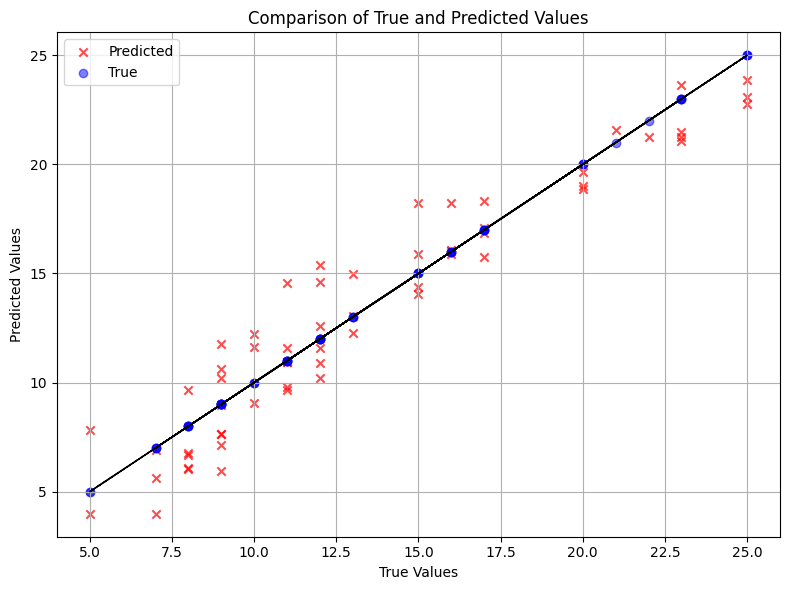

In [126]:
plt.figure(figsize=(8, 6))
plt.scatter(y_val, test_preds, color='red', label='Predicted', marker='x', alpha=0.7)
plt.scatter(y_val, y_val, color='blue', label='True', marker='o', alpha=0.5)
plt.plot(y_val, y_val, color='black', linestyle='--', linewidth=1) 
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Comparison of True and Predicted Values')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Thank You